In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, f1_score


In [2]:
data = pd.read_csv('D:/python folder/weather.csv')
data.dropna(inplace=True)

In [3]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [5]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall' , 'WindSpeed9am' , 'Humidity3pm', 'RainToday']]
y = data['RainTomorrow']

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X_copy = X.copy()  # create a copy of the DataFrame
X_copy['Cluster'] = kmeans.predict(X)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



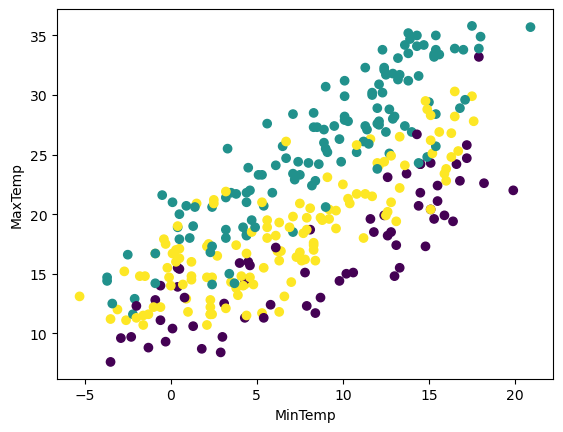

In [11]:
plt.scatter(X_copy['MinTemp'], X_copy['MaxTemp'], c=X_copy['Cluster'])
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [12]:

print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 0.88
Precision: 1.00
F1 Score: 0.33


In [13]:
#comparison between logistic regression and random forest

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('D:/python folder/weather.csv')

In [16]:
data.dropna(inplace=True)

In [17]:
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [18]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'Humidity3pm', 'RainToday']]
y = data['RainTomorrow']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
print('Accuracy: %.2f' % accuracy)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Accuracy: 0.88
Precision: 0.75
F1 Score: 0.43


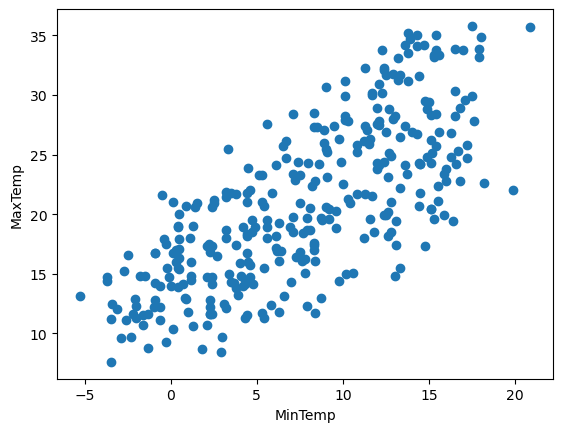

In [24]:
plt.scatter(data['MinTemp'], data['MaxTemp'])
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()